# 1. Del: Porazdelitvena funkcija normalne slučajne spremenljivke

Napišite učinkovito funkcijo, ki izračuna vrednosti porazdelitvene funkcije za standardno normalno porazdeljeno slučajno spremenljivko $X \sim N(0,1)$. Porazdelitvena funkcija je definirana kot:

$$
\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt
$$

Ker gre v zgornjem primeru za določen integral ne neomejenem intervalu $(-\infty, x]$, ga moramo za uporabo numeričnih metod najprej omejiti, ali pa preoblikovati v integral na končnem intervalu. V primeru porazdelitvene funkcije normalne slučajne spremenljivke že obstaja povezava s funkcijo napake (error function), ki je definirana kot:
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt
$$

Povezava med porazdelitveno funkcijo in funkcijo napake je naslednja:
$$
\Phi(x) = \frac{1}{2} \left(1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right)
$$

V svoji implementaciji bom uporabil Rombergovo metodo za računanje integralov. Rombergova metoda računa vrednost integrala oblike $\int_a^b f(x) dx$ po naslednjem algoritmu:
$$
h_n = \frac{b-a}{2^n} \qquad R(0,0) = h_1 (f(a) + f(b))
$$

$$
R(n, 0) = \frac{1}{2} R(n-1, 0) + h_n \sum_{k=1}^{2^{n-1}} f(a + (2k-1)h_n)
$$

$$
R(n,m) = R(n, m-1) + \frac{1}{4^{m}-1} (R (n, m-1) - R(n-1, m-1)) \\
$$

Red napake Rombergove metode za $R(n,m)$ je enak $O(h_n^{2m+2})$. 

In [2]:
# Dodajanje implementacije v Jupyter notebook
include("../src/main.jl");

# Testiranje implementacije
include("../tests/runtests_part1.jl");

Test Summary:                                            | Pass  Total  Time
Testiranje porazdelitvene funkcije normalne porazdelitve |  104    104  0.1s
  s tabeliranimi vrednostmi                              |    4      4  0.1s
  z uporabo paketa Distributions.jl                      |  100    100  0.0s


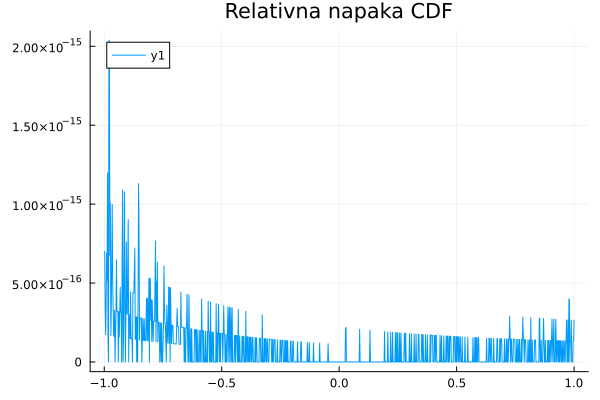

In [3]:
using Plots, Distributions

x_arr = range(-1, 1, length=1000)
y_arr = gaussian_cdf.(x_arr)
acc_y = cdf.(Normal(), x_arr)
rel_diff = [abs(y_arr[i] - acc_y[i]) / acc_y[i] for i in 1:length(x_arr)]
plot(x_arr, rel_diff, title="Relativna napaka CDF", legend=:topleft)

# 2. Del: Ploščina Hipotrohoide

Izračunajmo ploščino območja, ki ga omejuje hipotrohoida podana parametrično z enačbama:
$$
x(t) = (a+b)cos(t) + bcos(\frac{a+b}{b}t) \\
y(t) = (a+b)sin(t) + bsin(\frac{a+b}{b}t) \\
a = 1, b = -\frac{11}{7}
$$

Izhajali bomo iz formule za ploščino krivočrtnega trikotnika pod krivuljo:
$$
P = \frac{1}{2} \int_{t_1}^{t_2} (x(t)y'(t) - x'(t)y(t)) dt
$$

Hipotrohoida: a = 1.0, b = -1.5714285714285714
[-2.142857142857143, -0.0]
[-2.142857142857143, 1.2722191937457563e-14]


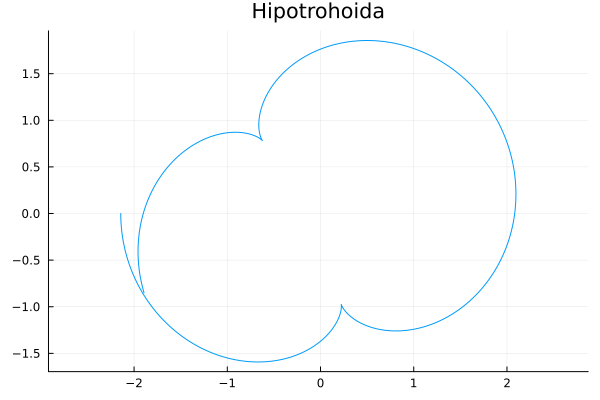

In [10]:
using Plots

a = 1.0
b = -11.0 / 7.0
ts = range(0, 7pi , length=1000)
xs = [hipotrohoida(a, b, t)[1] for t in ts]
ys = [hipotrohoida(a, b, t)[2] for t in ts]

t_start = 0
t_end = 22pi
val_start = hipotrohoida(a, b, t_start)
val_end = hipotrohoida(a, b, t_end)
println("Hipotrohoida: a = $a, b = $b")
println(val_start)
println(val_end)

plot(xs, ys, aspect_ratio=:equal, legend=false, title="Hipotrohoida")

In [ ]:
# First compute the range for t 

# Formulate the area using the equation above

# Compute